In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
path = "../processed/train/evaluated/paraphrase_dipper_samples_mistralai_94_EVALUATED_11_01_2024.csv"

In [7]:
df = pd.read_csv(path)

In [21]:
df["kgw-watermarked"][1]

"John Lubbock's assertion that one's character is self-chosen underscores personal autonomy and the power to shape one's inner being. While others, like a loving mother, can impart essential life lessons and social manners, they cannot install a good character. A good character encompasses honesty, compassion, responsibility, and positivity, among others. Essentially, we must decide which moral tenets influence our behaviour, both when facing life's difficulties and choices and when aiming to help ourselves and others. Cultivating a good character isn't only crucial to leading a virtuous and healthy life, but it sets an example that positively influences those around us. Additionally, altering our character contributes to personal growth that fosters stronger and more rewarding relationships. In conclusion, although external factors may shape aspects of behaviour, the essence of one's character lies within our choice and is integral to establishing a meaningful and well-rounded identit

In [26]:
df['pp-kgw-1'][4]

'Title: Examining the Impact of Technology in The 21st Century and Libraries Technology in the 21 s century revolutionized communication with easier access to the Internet, instant messaging, and international conferencing. But as digital screens became more commonplace, they also brought about visual issues such as blurry vision, eye strain, or emotional isolation. For libraries, the transition from traditional materials into digital media caused an increase in physical stress that could be felt through reduced face-to-face interaction; for example, there was increased need for electronic books—and this led to greater demand for printed material. '

In [8]:
kgw_wm_zscore = np.array(df["kgw-wm-zscore"])
non_wm_zscore = np.array(df["non-wm-zscore"])

In [9]:
no_of_paraphrases = 3
wmarked_paraphrased_scores = np.zeros(shape=(no_of_paraphrases, len(kgw_wm_zscore)))
nmarked_paraphrased_scores = np.zeros(shape=(no_of_paraphrases, len(kgw_wm_zscore)))

In [10]:
for i in range(1, no_of_paraphrases+1):
    wmarked_paraphrased_scores[i-1] = df[f"kgw-wm-pp-zscore-{i}"]
    nmarked_paraphrased_scores[i-1] = df[f"non-wm-pp-zscore-{i}"]

In [11]:
def comparison(arr_1, arr_2):
    arr_1_mean = arr_1.mean()
    arr_2_mean = arr_2.mean()
    
    arr_1_std = arr_1.std()
    arr_2_std = arr_2.std()
    
    print(f"base mean: {arr_1_mean:.4f}, pp mean: {arr_2_mean:.4f}")
    print(f"base std: {arr_1_std:.4f}, pp mean: {arr_2_std:.4f}")

In [12]:
comparison(kgw_wm_zscore, non_wm_zscore)

base mean: -0.4249, pp mean: -0.3442
base std: 0.9064, pp mean: 0.9690


In [13]:
image_path = "../results/images/z_score_comparisons_december/"

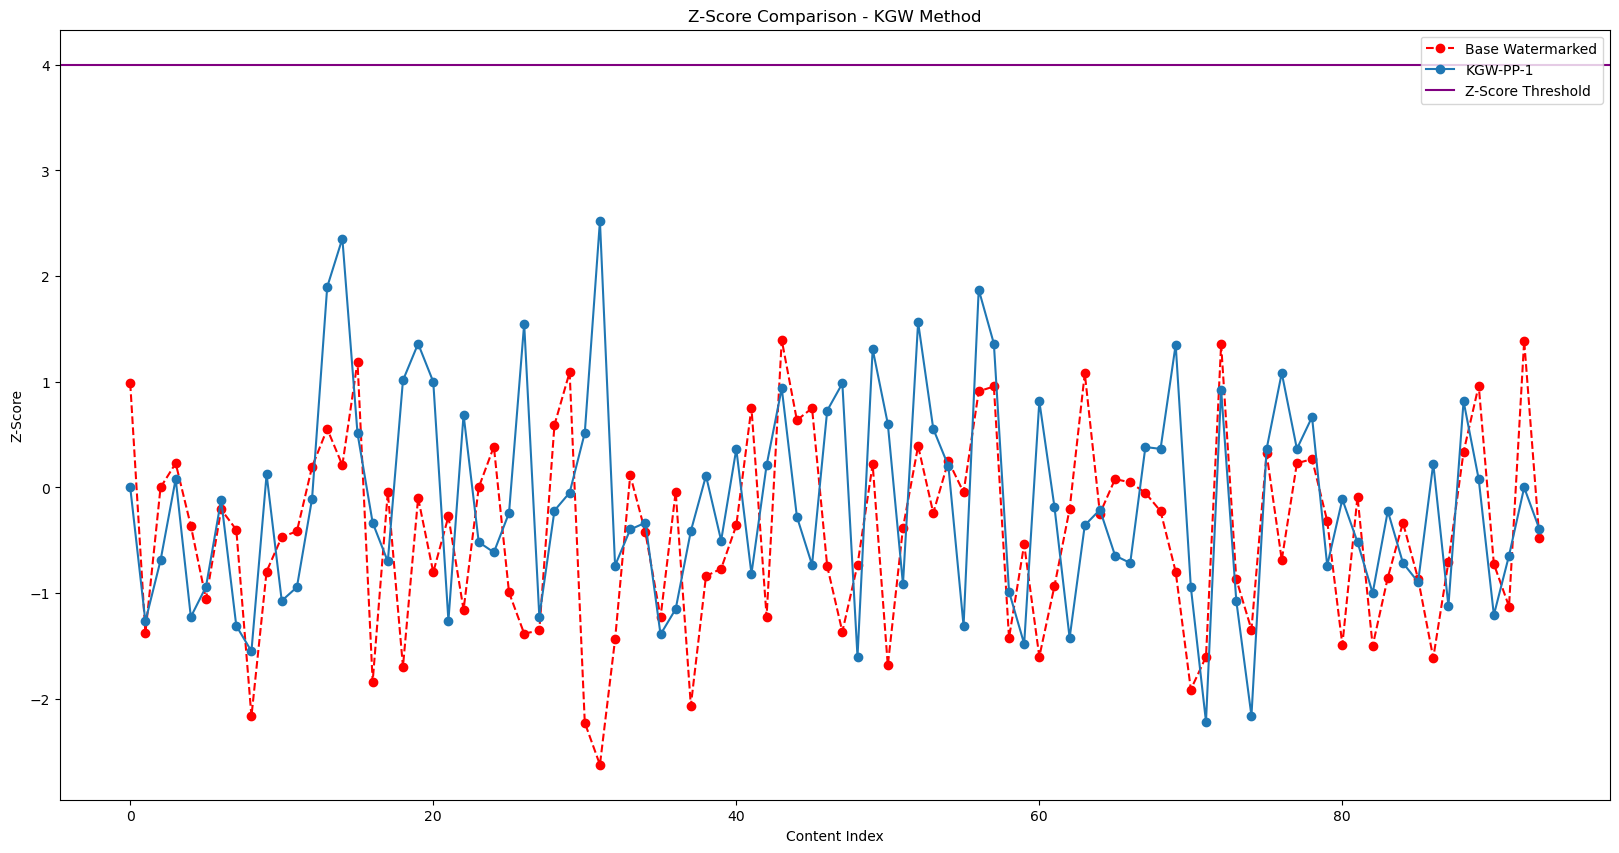

In [14]:
fig, axs = plt.subplots(1,1, figsize=(20,10))

axs.plot(list(range(len(kgw_wm_zscore))), kgw_wm_zscore, label="Base Watermarked", color='red', marker='o', linestyle="dashed")

for i in range(1):
    axs.plot(list(range(len(non_wm_zscore))), wmarked_paraphrased_scores[i], label=f"KGW-PP-{i+1}", marker='o')

axs.axhline(4, color='purple', label="Z-Score Threshold")
axs.set_ylabel("Z-Score")
axs.set_xlabel("Content Index")
axs.set_title("Z-Score Comparison - KGW Method")
axs.legend(loc='upper right')
# plt.savefig(image_path+"kgw_zscore_project.png")
plt.show()

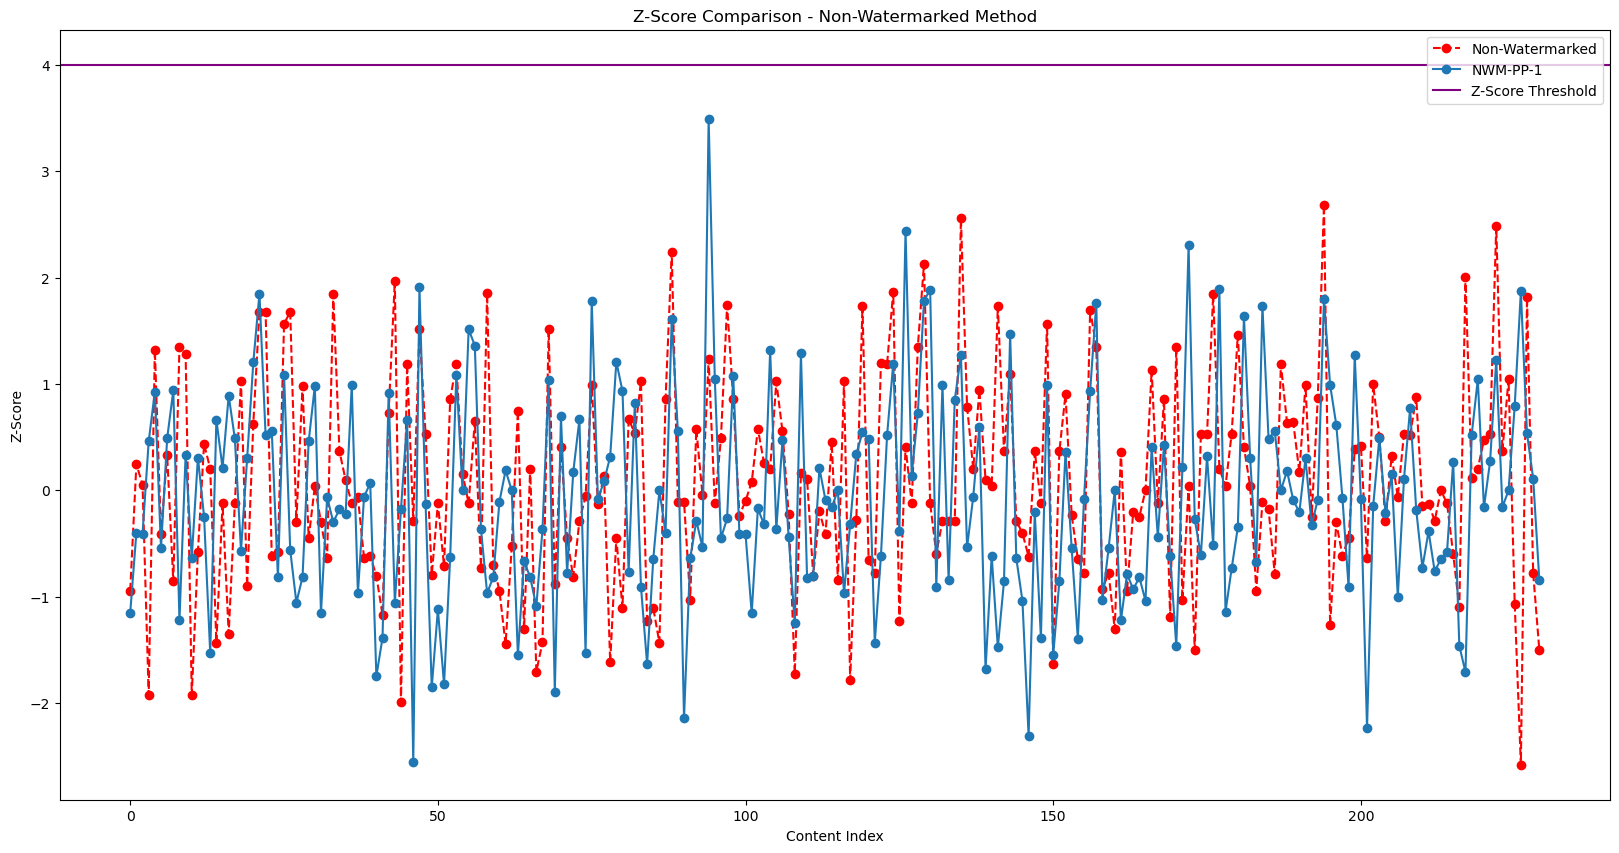

In [31]:
fig, axs = plt.subplots(1,1, figsize=(20,10))

axs.plot(list(range(len(non_wm_zscore))), non_wm_zscore, label="Non-Watermarked", color='red', marker='o', linestyle="dashed")

for i in range(1):
    axs.plot(list(range(len(non_wm_zscore))), nmarked_paraphrased_scores[i], label=f"NWM-PP-{i+1}", marker='o')

axs.axhline(4, color='purple', label="Z-Score Threshold")
axs.set_ylabel("Z-Score")
axs.set_xlabel("Content Index")
axs.set_title("Z-Score Comparison - Non-Watermarked Method")
axs.legend(loc='upper right')
# plt.savefig(image_path+"kgw_zscore_non_wmarked_project.png")
plt.show()